<a href="https://colab.research.google.com/github/Kyotaro65/googlecolab_prac/blob/main/pokemonPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##主成分分析(PCA)

In [ ]:
#変更

###データの読み込み

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #グラフをきれいに描画するため
sns.set_style('whitegrid') #グラフのスタイルを選べる

In [ ]:
from google.colab import files
uploaded=files.upload()  #Pokemon.csvをアップロード

Saving Pokemon.csv to Pokemon.csv


In [ ]:
df=pd.read_csv("Pokemon.csv")

In [ ]:
df.head() #TotalはHP～Speedの合計値。Legendaryは伝説のポケモンか否か

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [ ]:
df=df.drop(columns=["Name","Type 1","Type 2","Generation"]) #Legendaryに関係ない。文字列,定性データ,Type2はNaNも含む
df["Legendary"]=df["Legendary"].astype(int)  #True/Falseを整数(1/0)に変換　#データとして扱いやすい、[70]の描画のため
df.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,318,45,49,49,65,65,45,0
1,2,405,60,62,63,80,80,60,0
2,3,525,80,82,83,100,100,80,0
3,3,625,80,100,123,122,120,80,0
4,4,309,39,52,43,60,50,65,0


###前処理せずにモデル構築してみる

Legendaryをラベルとし、Legendary以外のカラムを用いて推量するモデル

In [ ]:
X=df.drop(columns=['Legendary'])
y=df['Legendary']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
print("LogisticRegression:",accuracy_score(y_pred_lr,y_test))

from sklearn.linear_model import Perceptron
model_pr=Perceptron()
model_pr.fit(X_train,y_train)
y_pred_pr=model_pr.predict(X_test)
from sklearn.metrics import accuracy_score
print("Perceptron:",accuracy_score(y_pred_pr,y_test))

from sklearn.neighbors import KNeighborsClassifier
model_k=KNeighborsClassifier()
model_k.fit(X_train,y_train)
y_pred_k=model_k.predict(X_test)
print("KNeighborsClassifier:",accuracy_score(y_pred_k,y_test))

from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(X_train,y_train)
y_pred_svm=model_svm.predict(X_test)
print("SVM:",accuracy_score(y_pred_svm,y_test))

LogisticRegression: 0.94375
Perceptron: 0.90625
KNeighborsClassifier: 0.94375
SVM: 0.93125


###主成分分析

####HP～Speedの相関関係を見る

HP～Speedまでの6つの特徴量から2つだけ取り出してグラフにする。(散布図を用いる)

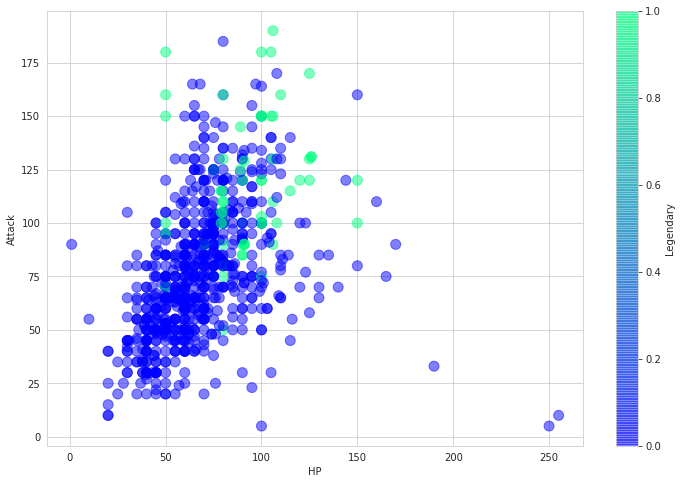

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))#横12インチ,縦8インチ
df.plot(kind="scatter",x="HP",y="Attack",s=100,c="Legendary",cmap="winter",alpha=0.5,ax=ax)
  #df.plot引数 kind:グラフの種類 x:横軸の特徴量 y:縦軸の特徴量 s:点のサイズ c:色or色軸の特徴量 cmap:色どり alpha:透過率 ax:複数プロットを重ねる場合のサブプロット
#↓緑が伝説のポケモン,青が普通のポケモン。→HPとAttackで全体的に正の相関がある→次元削減できる

In [ ]:
#他の相関関係も見たい
df.loc[:,"HP":"Speed"].corr() #0~799行で、HP~Speed総当たりの相関係数を表示 #df.locは配列のスライスのようなもの(locを入れないとスライスは行についてとみなされる)。切り取って新たな軸とする。

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


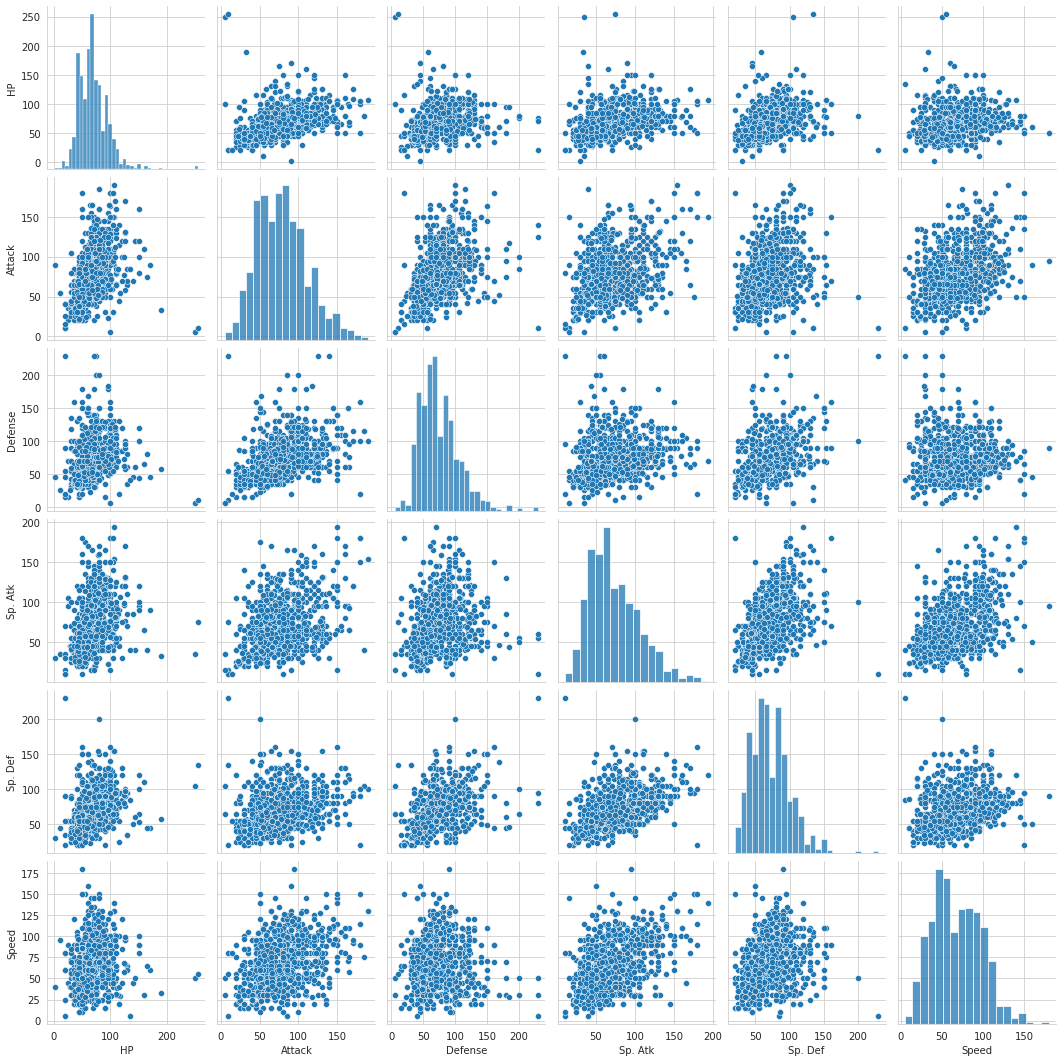

In [ ]:
#上の表をそれぞれ可視化
sns.pairplot(df.loc[:,"HP":"Speed"])
#↓正の相関強いところあり

####sklearnのPCAを使う

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

#####主成分に軸を取り直す

In [ ]:
x_pca=pca.fit_transform(df.loc[:,"HP":"Speed"])   #主成分分析を行う。コードは学習と同じイメージ
df_pca=pd.DataFrame(x_pca,columns=["1st","2nd","3rd","4th","5th","6th"])
df_pca.head()                      #↑第1～6成分に軸を取り直す。データの特に重要な成分=分散の大きい軸

,1st,2nd,3rd,4th,5th,6th
0,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700
1,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004
2,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865
3,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346
4,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302


In [ ]:
pca.explained_variance_ratio_  #寄与率＝各成分が全体のデータの何%を説明できているか
#↑pcaの属性

array([0.46096131, 0.18752145, 0.13584163, 0.09803479, 0.07378238,
       0.04385843])

In [ ]:
pca.explained_variance_ratio_.cumsum()  #累積寄与率＝第1～各成分までの寄与率の合計
#↓第3成分までで80%近く(80でカットが通例)　#第4～6成分をカットしても全体のデータの80%は残して学習に使える

array([0.46096131, 0.64848277, 0.7843244 , 0.88235919, 0.95614157,
       1.        ])

PCAせずに適当に特徴量をカットするともしLegendaryと相関の強い特徴量をカットしてしまった場合にモデルの精度がガタ落ち

PCAをしたことで第4～6は全体にとってあまり意味のない軸となったのでこれを削除しても精度を落とすことなく、計算の削減や、さらに3次元以下なら可視化が可能 

In [ ]:
pca.components_ #第1～6成分とHP～Speedのそれぞれの相関係数

array([[ 0.30080785,  0.49289178,  0.38063453,  0.50898063,  0.39436984,
         0.32726262],
       [ 0.04221029,  0.0765448 ,  0.69521578, -0.38331141,  0.17389431,
        -0.57607928],
       [-0.05898335, -0.73043106,  0.04150427,  0.38478597,  0.54078717,
        -0.14407571],
       [ 0.80159275,  0.02736268, -0.36601146,  0.10099765, -0.04170419,
        -0.45912547],
       [ 0.38716678, -0.1932467 , -0.02643827, -0.64085394,  0.37522525,
         0.51046142],
       [-0.33437231,  0.42376414, -0.48518697, -0.15829258,  0.61583212,
        -0.26250137]])

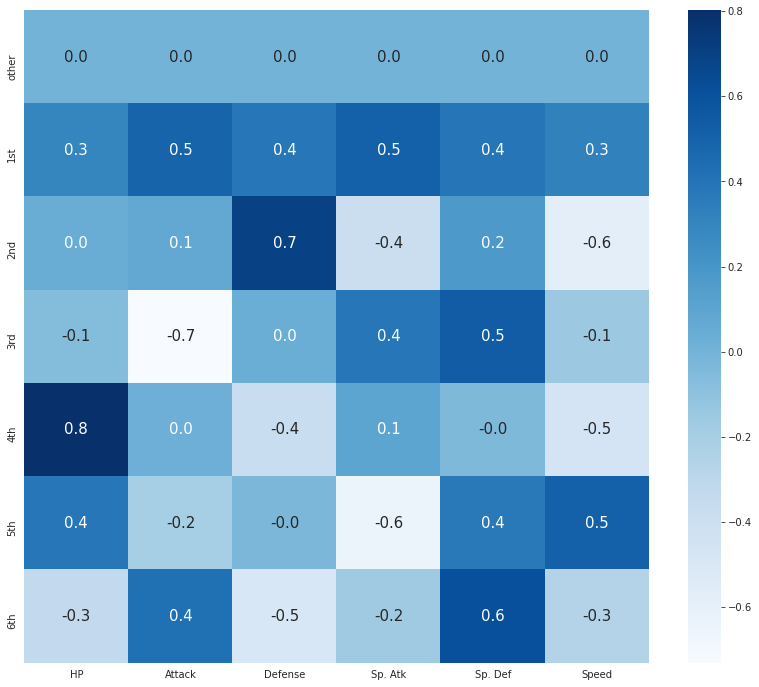

In [ ]:
#もっと見やすく可視化(ヒートマップ)
a=pca.components_
import numpy as np
b=np.array([[0,0,0,0,0,0]]) #2次元配列の第1行目
c=np.vstack((b,a))

plt.figure(figsize=(14,12))
sns.heatmap(c,
            cmap="Blues",
            annot=True,
            annot_kws={"size":15},
            fmt="1.1f",
            xticklabels=df.loc[:,"HP":"Speed"].columns,
            yticklabels=["other","1st","2nd","3rd","4th","5th","6th"])

第1主成分は総合力,第2主成分は守備型,などと読み取れる

#####次元(成分,軸)を削減してみる

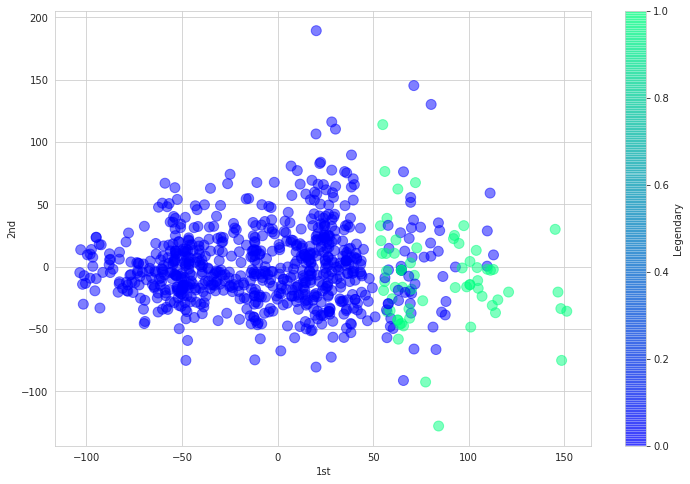

In [ ]:
#1st,2nd,Legendaryの関係を見てみる
df_pca["Legendary"]=df["Legendary"] #df_pcaにカラム"Legendary"を追加

fig,ax=plt.subplots(figsize=(12,8))
df_pca.plot(kind="scatter",x="1st",y="2nd",s=100,c="Legendary",cmap="winter",alpha=0.5,ax=ax)

Legendaryが1st=50くらいのところできれいに割れている

→重要な特徴量だけうまく抽出できている

###モデルに入れて学習を行う

In [ ]:
df_pca.head()

,1st,2nd,3rd,4th,5th,6th,Legendary
0,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700,0
1,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004,0
2,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865,0
3,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346,0
4,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302,0


In [ ]:
#第4～6成分を切り落とす
X=df_pca.drop(columns=["4th","5th","6th","Legendary"])
y=df_pca["Legendary"]
X.head()

,1st,2nd,3rd
0,-45.860728,-5.384432,18.925550
1,-11.152937,-5.805620,20.848717
2,36.946009,-5.236130,21.520463
3,80.128413,18.995343,29.313909
4,-50.385905,-21.792797,3.921880


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=lr.predict(X_test)
accuracy_score(y_test,pred)
#精度があまり下がらない上、可視化ができてデータに対する解釈が上がり、計算時間も短縮

0.925

In [ ]:
#参考
print("ロジスティク回帰:",accuracy_score(y_test,pred))

pr=Perceptron()
pr.fit(X_train,y_train)
pred=pr.predict(X_test)
print("パーセプトロン:",accuracy_score(y_test,pred))

k=KNeighborsClassifier()
k.fit(X_train,y_train)
pred=k.predict(X_test)
print("K近傍法:",accuracy_score(y_test,pred))

svm=SVC()
svm.fit(X_train,y_train)
pred=svm.predict(X_test)
print("SVM:",accuracy_score(y_test,pred))




ロジスティク回帰: 0.925
パーセプトロン: 0.8375
K近傍法: 0.925
SVM: 0.91875
